# Visualization

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [3]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [4]:
data_folder = '/content/mnt/MyDrive/Data/PopulationExtinction'

In [5]:
pop = pd.read_csv(f'{data_folder}/IDClassification.csv', encoding = 'EUC-KR')
pop.head()

,광역시도,시군구,20 ~ 39세계,20 ~ 39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,소멸 위기 고위험 지역,ID
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원)
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초


In [6]:
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')
map_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [7]:
map_raw.stack()

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 250, dtype: object

In [8]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace = True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [9]:
map.columns = ['y', 'x', 'ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [10]:
!cp $data_folder/draw_map.py .

In [11]:
!ls -l

total 16
-rw------- 1 root root 5269 Sep  6 05:17 draw_map.py
drwx------ 5 root root 4096 Sep  6 05:17 mnt
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [12]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

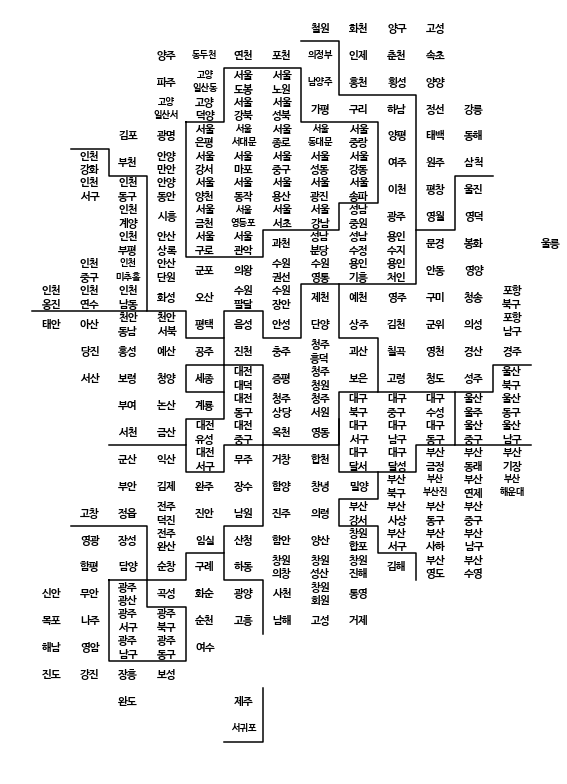

In [13]:
plt.figure(figsize = (8, 11))
for idx, row in map.iterrows():
    if len(row.ID.split()) == 2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2] == '고성':
        dispname = '고성'
    else:
        dispname = row.ID
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    plt.annotate(
        dispname,
        (row['x'] + 0.5, row['y'] + 0.5),
        weight = 'bold',
        fontsize = fontsize,
        ha='center',
        va='center',
        linespacing = linespacing
    )
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c = 'black', lw = 1.5)
plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)
plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
pop = pd.merge(pop, map, how = 'left', on = 'ID')
print(pop.shape)
pop.head()

(250, 14)


,광역시도,시군구,20 ~ 39세계,20 ~ 39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,소멸 위기 고위험 지역,ID,y,x
0,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,True,False,강릉,3,11
1,강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,True,False,고성(강원),0,10
2,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,True,False,동해,4,11
3,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,True,False,삼척,5,11
4,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,False,False,속초,1,10


In [15]:
pop.isnull().sum().sum()

0

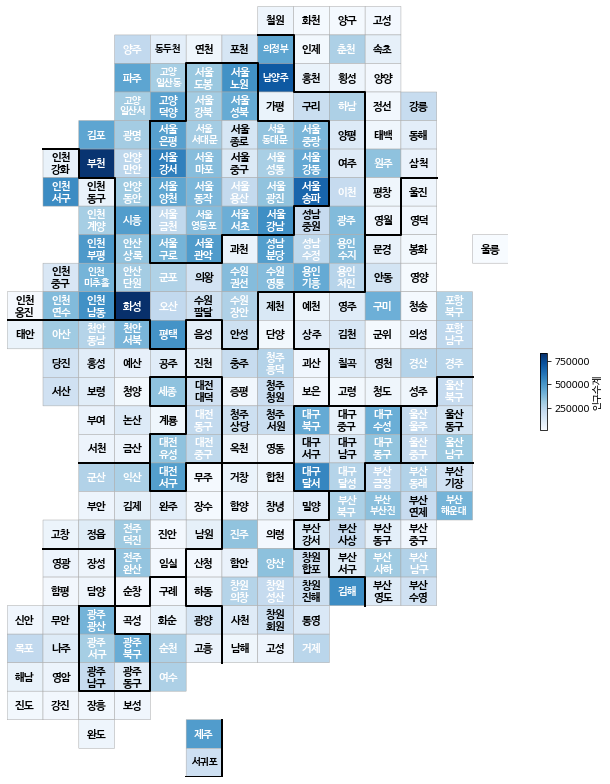

In [16]:
drawKorea('인구수계', pop, 'Blues')

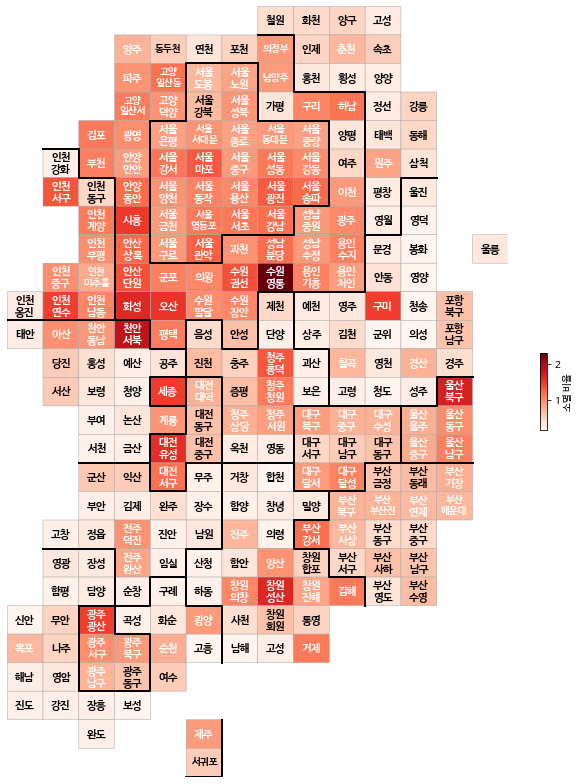

In [17]:
drawKorea('소멸 비율', pop, 'Reds')

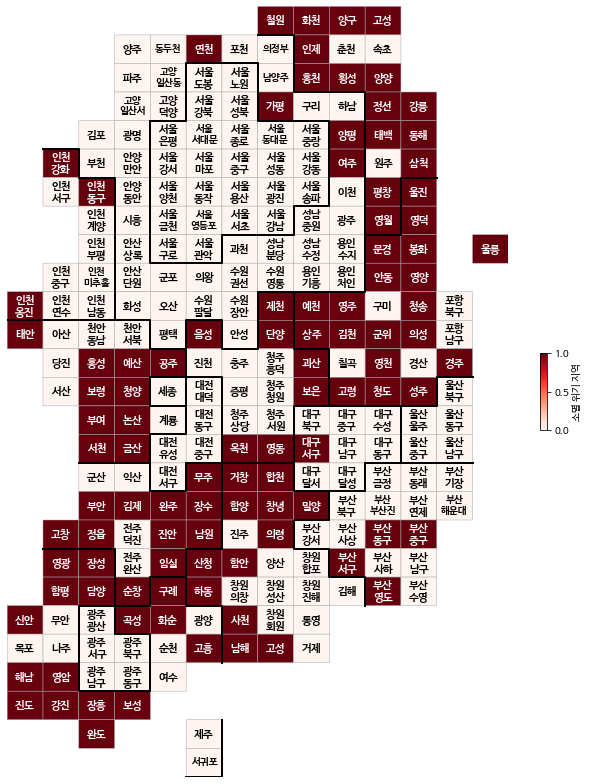

In [18]:
pop['소멸 위기 지역'] = pop['소멸 위기 지역'].astype(int)
drawKorea('소멸 위기 지역', pop, 'Reds')

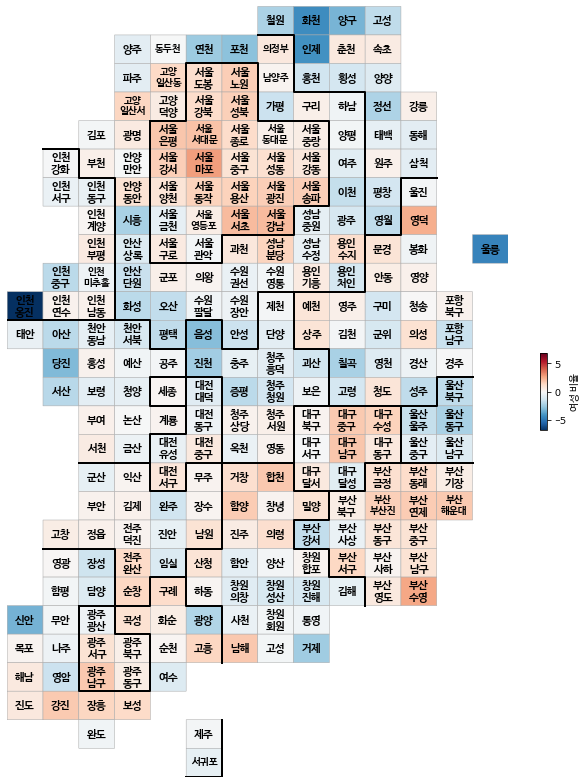

In [19]:
pop['여성 비율'] = (pop['인구수여자'] / pop['인구수계'] - 0.5) * 100
drawKoreaMinus('여성 비율', pop, 'RdBu_r')

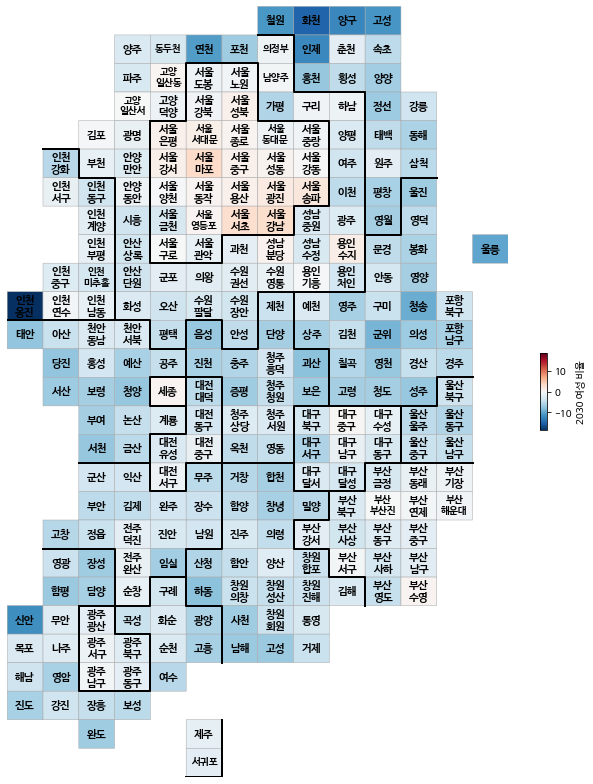

In [20]:
pop['2030 여성 비율'] = (pop['20 ~ 39세여자'] / pop['20 ~ 39세계'] - 0.5) * 100
drawKoreaMinus('2030 여성 비율', pop, 'RdBu_r')

In [21]:
import folium
import json

In [22]:
pop.set_index('ID', inplace = True)
pop.head()

,광역시도,시군구,20 ~ 39세계,20 ~ 39세여자,65세 이상계,인구수계,인구수남자,인구수여자,소멸 비율,소멸 위기 지역,소멸 위기 고위험 지역,y,x,여성 비율,2030 여성 비율
ID,,,,,,,,,,,,,,,
강릉,강원도,강릉시,47006,21807,43830,211643,105025,106618,0.497536,1,False,3,11,0.376341,-3.608050
고성(강원),강원도,고성군,5217,2042,7755,26792,13864,12928,0.263314,1,False,0,10,-1.746790,-10.858731
동해,강원도,동해시,18727,8258,17572,89814,45572,44242,0.469952,1,False,4,11,-0.740419,-5.903241
삼척,강원도,삼척시,13583,6117,16077,65623,33275,32348,0.380481,1,False,5,11,-0.706307,-4.965766
속초,강원도,속초시,18080,8171,15170,81497,40312,41185,0.538629,0,False,1,10,0.535603,-4.806416


In [23]:
geo_data = json.load(open(f'{data_folder}/skorea_municipalities_geo_simple.json'))
map = folium.Map(
    location = [35.9902, 127.054],
    zoom_start = 7,
)
folium.Choropleth(
    geo_data = geo_data,
    data = pop['인구수계'],
    columns = (pop.index, pop['인구수계']),
    key_on = 'feature.id',
    fill_color = 'YlGnBu',
    legend_name = '인구수'
).add_to(map)
title = "<h3 align = 'center' style = 'font-size:20px'>기초 자치 단체 별 인구 수</h3>"
map.get_root().html.add_child(folium.Element(title))
map

In [24]:
map = folium.Map(
    location = [35.9902, 127.054],
    zoom_start = 7,
)
folium.Choropleth(
    geo_data = geo_data,
    data = pop['소멸 위기 지역'],
    columns = (pop.index, pop['소멸 위기 지역']),
    key_on = 'feature.id',
    fill_color = 'PuBu'
).add_to(map)
title = "<h3 align = 'center' style = 'font-size:20px'>소멸 위기 지역</h3>"
map.get_root().html.add_child(folium.Element(title))
map